<a href="https://colab.research.google.com/github/smpark0520/ESAA/blob/main/%ED%8C%8C%EC%9D%B4%EC%8D%AC_%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D_%EC%99%84%EB%B2%BD%EA%B0%80%EC%9D%B4%EB%93%9C_pg_210_~_244.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 앙상블 학습
: 여러 개의 분류기 (Classifier)를 생성하 고 그 예측을 결합함으로써 보다 정확한 최종 예측을 도출하는 기법

 - 유형 : 보팅(Voting), 배깅(Bagging), 부스팅(Boosting)

- 보팅 : 일반적으로 서로 다른 알고리즘을 가진 분류기를 결합하는 것
- 배깅 : 각각의 분류기가 모두 같은 유형의 알고리즘 기반이지만, 데이터 샘플링을 서로 다르게 가져가면서 학습을 수행해 보팅을 수행 하는 것 (ex. 랜덤 포레스트)

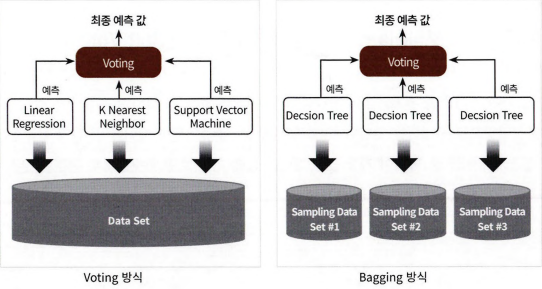

# 보팅 유형  - 하드 보팅(Hard Voting)과 스그트 보팅(Soft Voting)
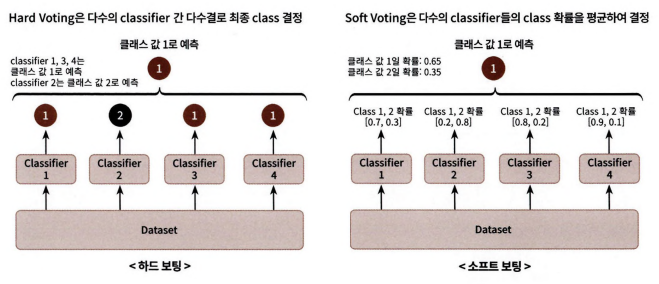

- 하드 보팅 : 다수결 원칙과 비슷. 예측한 결괏값들 중 다수의 분류기가 결정한 예측값을 최종 보팅 결괏값으로 선정하는 것
- 소프트 보팅 : 분류기들의 레이블 값 결정 확률을 모두 더하고 이를 평균해서 이들 중 확률이 가장 높은 레이블 값을 최종 보팅 결괏값으로 선정

# 보팅 분류기(Voting Classifier)

- 보팅 방식의 앙상블을 이용해 위스콘신 유방암 데이터 세트를 예측 분석

- 위스콘신 유방 암 데이터 세트는 유방암의 악성종양, 양성종양 여부를 결정하는 이진 분류 데이터 세트이며 종양의 크 기, 모양 등의 형태와 관련한 많은 피처를 가지고 있음

- 로지스틱 회귀와 KNN을 기반으로 보팅 분류기를 만들어

In [2]:
import pandas as pd

from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

cancer = load_breast_cancer()

data_df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
data_df.head(3)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758


- 로지스틱 회귀와 KNN을 기반으로 하여 소프트 보팅 방식으로 새롭게 보팅 분류기를 만들기
- VotingClassifier 클래스의 주요 생성 인자 : estimators와 voting

 estimators : 리스트 값으로 보팅에 사용될 여러 개의 Classifier 객체들을 튜플 형식으로 입력받음

 voting = 'hard' : 하드 보팅, 'soft' :  소프트 보팅

In [3]:
# 개별 모델은 로지스틱 회귀와 KNN임
lr_clf = LogisticRegression(solver='liblinear')
knn_clf = KNeighborsClassifier(n_neighbors=8)

# 개별 모델을 소프트 보팅 기반의 앙상블 모델로 구현한 분류기
vo_clf = VotingClassifier(estimators=[('LR',lr_clf), ('KNN',knn_clf)], voting='soft')

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size=0.2, random_state=156)

# VotingClassifier 학습/예측 평가
vo_clf.fit(X_train, y_train)
pred = vo_clf.predict(X_test)
print('Voting 분류기 정확도: {0:.4f}'.format(accuracy_score(y_test, pred)))

# 개별 모델의 학습/예측/평가
classifiers = [lr_clf, knn_clf]
for classifier in classifiers:
  classifier.fit(X_train, y_train)
  pred = classifier.predict(X_test)
  class_name=classifier.__class__.__name__
  print('{0} 정확도: {1:.4f}'.format(class_name, accuracy_score(y_test, pred)))

Voting 분류기 정확도: 0.9561
LogisticRegression 정확도: 0.9474
KNeighborsClassifier 정확도: 0.9386


- 보팅 분류기가 정확도가 조금 높게 나옴

# 랜덤 포레스트의 개요 및 실습
배깅(bagging) : 같은 알고리즘으로 여러 개의 분류기를 만들어서 보팅으로 최종 결정하는 알고리즘

 대표적인 알고리즘 : 랜덤 포레스트
  - 앙상블 알고리즘 중 비교적 빠른 수행 속도를 가지고 있으며, 다양한 영역에서 높은 예측 성능을 보이고 있음
  - 랜덤 포레스트의 기반 알고리즘은 결정 트리로서, 결정 트리의 쉽고 직관적인 장점을 그대로 가지고 있음(랜덤 포레스트뿐만 아니라 부스팅 기반의 다양한 앙상블 알고리즘 역시 대부분 결정 트리 알고리즘을 기반 알고리즘으로 채택하고 있음).
  - 여러 개의 결정 트리  분류기가 전체 데이터에서 배깅 방식으로 각자의 데이터를 샘플링해 개별적으로 학습을 수행한 뒤 최종적으로 모든 분류기가 보팅을 통해 예측 결정을 하게 됨.

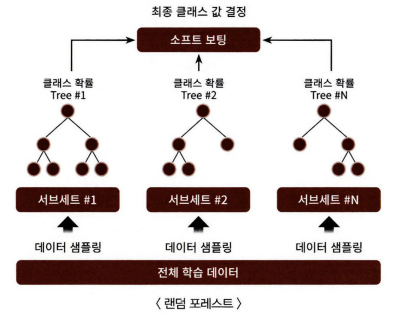

- 부트스트래핑 분할 방식 : 여러 개의 데이터 세 트를 중첩되게 분리하는 것(bootstrap aggregating)

- 원본 데이터가 10개인 학습 데이터 세트에 랜덤 포레스트를 3개의 결정 트리 기반으로 학습한 경우 아래와 같은 데이터 서브세트 생성


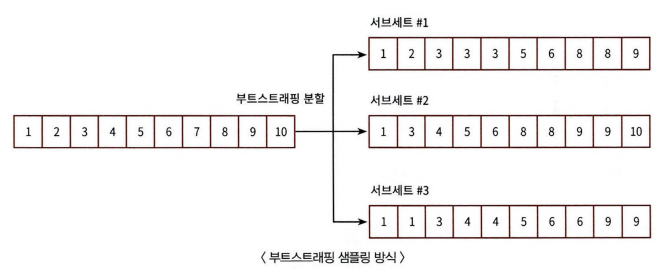

In [4]:
def get_new_feature_name_df(old_feature_name_df):
    feature_dup_df = pd.DataFrame(data=old_feature_name_df.groupby('column_name').cumcount(),
                                  columns=['dup_cnt'])
    feature_dup_df = feature_dup_df.reset_index()
    new_feature_name_df = pd.merge(old_feature_name_df.reset_index(), feature_dup_df, how='outer')
    new_feature_name_df['column_name'] = new_feature_name_df[['column_name', 'dup_cnt']].apply(lambda x : x[0]+'_'+str(x[1])
                                                                                         if x[1] >0 else x[0] ,  axis=1)
    new_feature_name_df = new_feature_name_df.drop(['index'], axis=1)
    return new_feature_name_df

In [5]:
import pandas as pd

def get_human_dataset( ):

    # 각 데이터 파일들은 공백으로 분리되어 있으므로 read_csv에서 공백 문자를 sep으로 할당.
    feature_name_df = pd.read_csv('/content/drive/MyDrive/features.txt',sep='\s+',
                        header=None,names=['column_index','column_name'])

    # 중복된 피처명을 수정하는 get_new_feature_name_df()를 이용, 신규 피처명 DataFrame생성.
    new_feature_name_df = get_new_feature_name_df(feature_name_df)

    # DataFrame에 피처명을 컬럼으로 부여하기 위해 리스트 객체로 다시 변환
    feature_name = new_feature_name_df.iloc[:, 1].values.tolist()

    # 학습 피처 데이터 셋과 테스트 피처 데이터을 DataFrame으로 로딩. 컬럼명은 feature_name 적용
    X_train = pd.read_csv('/content/drive/MyDrive/X_train.txt',sep='\s+', names=feature_name )
    X_test = pd.read_csv('/content/drive/MyDrive/X_test.txt',sep='\s+', names=feature_name)

    # 학습 레이블과 테스트 레이블 데이터을 DataFrame으로 로딩하고 컬럼명은 action으로 부여
    y_train = pd.read_csv('/content/drive/MyDrive/y_train.txt',sep='\s+',header=None,names=['action'])
    y_test = pd.read_csv('/content/drive/MyDrive/y_test.txt',sep='\s+',header=None,names=['action'])

    # 로드된 학습/테스트용 DataFrame을 모두 반환
    return X_train, X_test, y_train, y_test


X_train, X_test, y_train, y_test = get_human_dataset()

<ipython-input-4-92110e44b328>:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if x[1] >0 else x[0] ,  axis=1)
<ipython-input-4-92110e44b328>:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  new_feature_name_df['column_name'] = new_feature_name_df[['column_name', 'dup_cnt']].apply(lambda x : x[0]+'_'+str(x[1])


In [6]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

# 결정트리에서 사용한 get_human_dataset()이용해 데이터 split
X_train, X_test, y_train, y_test  = get_human_dataset()

# 랜덤 포레스트 학습 및 별도의 테스트 세트로 예측 성능 평가
rf_clf = RandomForestClassifier(random_state=0)
rf_clf.fit(X_train, y_train)
pred = rf_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print('랜덤 포레스트 정확도: {0:.4f}'.format(accuracy))

랜덤 포레스트 정확도: 0.9253


- 랜덤 포레스트는 사용자 행동 인식  데이터  세트에 대해 약 92.53%의  정확도를 보여줌

# 랜덤 포레스트 하이퍼 파라미터 및 튜닝

In [7]:
from sklearn.model_selection import GridSearchCV

params = {
    'max_depth': [8, 16, 24],
    'min_samples_leaf' : [1, 6, 12],
    'min_samples_split' : [2,8,16]
}
# RandomForestClassifier 객체 생성 후 GridSearchCV 수행
rf_clf = RandomForestClassifier(n_estimators=100, random_state=0, n_jobs=-1)
grid_cv = GridSearchCV(rf_clf , param_grid=params , cv=2, n_jobs=-1)
grid_cv.fit(X_train , y_train)
print('최적  하이퍼  파라미터:\n', grid_cv.best_params_)
print('최고 예측 정확도: {0:.4f}'.format(grid_cv.best_score_))

최적  하이퍼  파라미터:
 {'max_depth': 16, 'min_samples_leaf': 6, 'min_samples_split': 2}
최고 예측 정확도: 0.9165


- max_depth : 16, min_samples_leaf: 6, min_samples_split: 2일 때 2개의 CV 세트에서 약 91.65%의  평균 정확도가 측정
- 이렇게 추출된 최적  하이퍼  파라미터로 다시  RandomForest Classifier를 학습시킨 뒤에 이번에는 별도의 테스트 데이터 세트에서 예측 성능을 측정

In [8]:
rf_clf1 = RandomForestClassifier(n_estimators=100, min_samples_leaf=6, max_depth=16, min_samples_split=2, random_state=0)
rf_clf1.fit(X_train , y_train)
pred = rf_clf1.predict(X_test)
print('예측 정확도: {0:.4f}'.format(accuracy_score(y_test, pred)))

예측 정확도: 0.9260


- 별도의 테스트 데이터 세트에서 수행한 예측 정확도 수치는 약 92.60%
- 피처 중요도를 막대그래프로 시각화

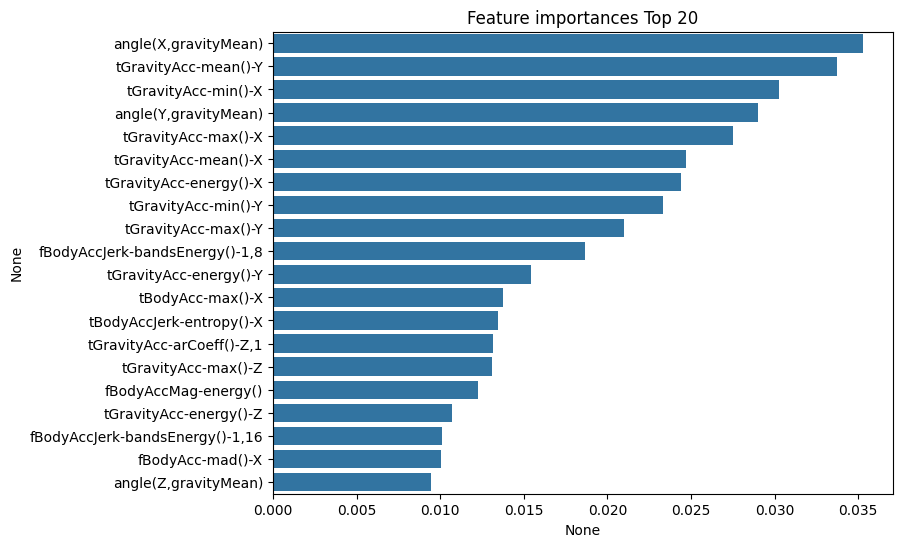

In [9]:
import matplotlib.pyplot as plt
import seaborn as  sns
%matplotlib inline

ftr_importances_values = rf_clf1.feature_importances_
ftr_importances = pd.Series(ftr_importances_values,  index=X_train.columns)
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]


plt.figure(figsize=(8, 6))
plt.title('Feature importances Top 20')
sns.barplot(x=ftr_top20,  y=ftr_top20.index)
plt.show()

# GBM의 개요 및 실습
부스팅 알고리즘 : 여러 개의 약한 학습기(weak learner)를 순차적으로 학습-예측하면서 잘못 예측한 데이터에 가중치 부여를 통해 오류를 개선해 나가면서 학습하는 방식(에이다 부스트, 그래디언트 부스트)
 - 1. AdaBoost(Adaptive boosting) : 오류 데이터에 가중치를 부여하면서 부스팅을 수행하는 대표적인 알고리즘


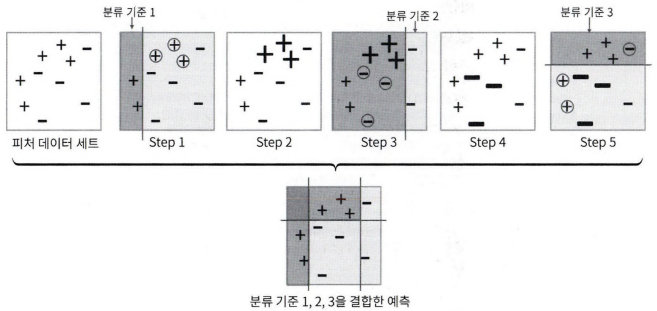

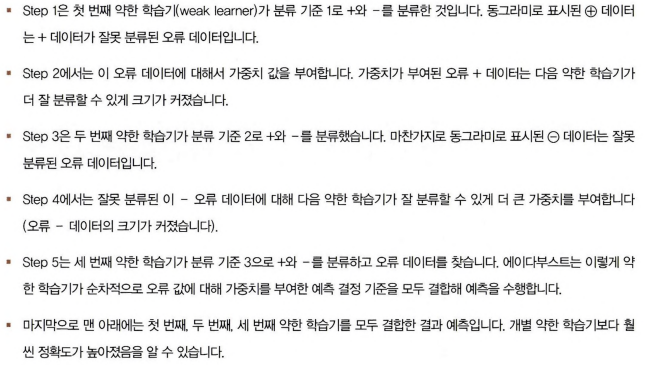

 - 2.GBM(Gradient Boost Machine): 에이다부스트와 유사하나, 가중치 업데이트를 경사 하강법 (Gradient Descent : 반복 수행을 통해 오류를 최소화할 수 있도록 가중치의 업데이트 값을 도출하는 기법)을 이용

- 사이킷런의 GBM을 이용해 사용자 행동 데이터 세트를 예측 분류& 수행 시간도 같이 측정

In [10]:
from sklearn.ensemble import GradientBoostingClassifier
import time
import warnings
warnings.filterwarnings('ignore')


X_train, X_test, y_train, y_test = get_human_dataset()

# GBM 수행 시간 측정을 위함. 시작 시간 설정.
start_time = time.time()

gb_clf = GradientBoostingClassifier(random_state=0)
gb_clf.fit(X_train, y_train)
gb_pred = gb_clf.predict(X_test)
gb_accuracy = accuracy_score(y_test, gb_pred)
print('GBM  정확도:  {0:.4f}'.format(gb_accuracy))
print("GBM 수행  시간: {0:.1f} 초  ".format(time.time() -  start_time))

GBM  정확도:  0.9386
GBM 수행  시간: 1194.4 초  


- 기본 하이퍼 파라미터만으로 93.89%의 예측 정확도로 앞의 랜덤 포레스트보다 나은 예측 성능을 나타냄

# XGBoost 개요

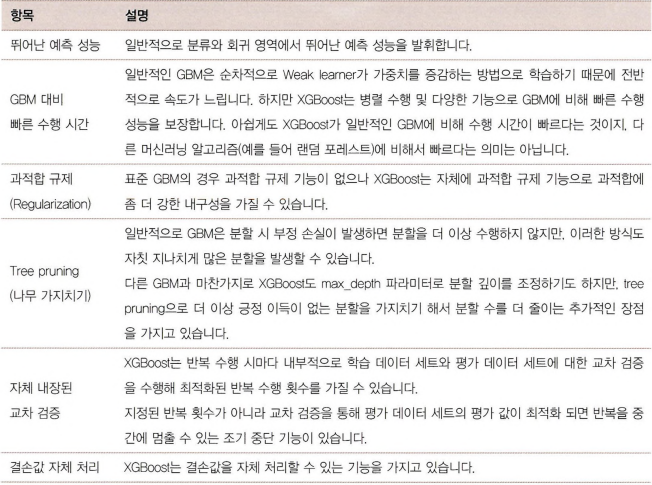

In [11]:
pip install xgboost==1.5.0

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 173.5/173.5 MB 6.8 MB/s eta 0:00:00
  Attempting uninstall: xgboost
    Found existing installation: xgboost 2.1.1
    Uninstalling xgboost-2.1.1:
      Successfully uninstalled xgboost-2.1.1


In [12]:
import xgboost as xgb
from xgboost import XGBClassifier

In [13]:
import xgboost
print(xgboost.__version__)

1.5.0


파이썬 래퍼 XGBoost 적용  - 위스콘신 유방암 예측
- 종양의 크기, 모양 등의 다양한 속성값을 기반으로 악성 종양 (malignant)인지 양성 종양(benign)인지를 분류한 데이터 세트

In [14]:
import xgboost as xgb
from xgboost import plot_importance
import pandas  as  pd
import numpy  as  np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')


dataset = load_breast_cancer()
features= dataset.data
labels = dataset.target

cancer_df = pd.DataFrame(data=features,  columns=dataset.feature_names)
cancer_df['target']=  labels
cancer_df.head(3)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0


- 종양의 크기와 모양에 관련된 많은 속성이 숫자형 값으로 되어 있음
- 타깃 레이블 값의 종류는 악성인 'malignant' : 0 , 양성인 'benign' : 1

In [15]:
print(dataset.target_names)
print(cancer_df['target'].value_counts())

['malignant' 'benign']
target
1    357
0    212
Name: count, dtype: int64


- 1(양성) benign이  357개, 0(악성) malignant가 212개로 구성

- 위스콘신 유방암 데이터 세트의 80%를 학습용으로, 20%를 테스트용으로 추출

- 80%의 학습용 데이터에서 90%를 최종 학습용, 10%를 검증용으로 분할

- 여기서 검증용 데이터 세트를 별도로 분할하는 이유는 XGBoost가 제공하는 기능인 검증 성능 평가와 조기 중단(early stopping)을 수행해 보기 위함.

-cancer_df의 맨 마지막 칼럼이 레이블이므로 피처용 DataFrame은 cancer_ df의 첫번째 칼럼에서 맨 마지막 두번째 칼럼까지를 :-1 슬라이싱으로 추출

In [16]:
# cancer_df에서 feature용 DataFrame과 Label용 Series 객체 추출
# 맨 마지막 칼럼이 Label임. Feature용 DataFrame은 cancer_df의 첫번째 칼럼에서 맨 마지막 두번째 칼럼까지를 ：-1 슬라이싱으로 추출.
X_features = cancer_df.iloc[:, :-1]
y_label = cancer_df.iloc[:, -1]


# 전체 데이터 중  80%는 학습용 데이터, 20%는 테스트용 데이터 추출
X_train, X_test, y_train, y_test=train_test_split(X_features, y_label, test_size=0.2, random_state= 156  )
# 위에서 만든 X.train, y_train을 다시 쪼개서 90%는 학습과 10%는 검증용 데이터로 분리
X_tr, X_val, y_tr, y_val= train_test_split(X_train, y_train, test_size=0.1, random_state=156 )

print(X_train.shape,  X_test.shape)
print(X_tr.shape, X_val.shape)

(455, 30) (114, 30)
(409, 30) (46, 30)


- 전체 569개의 데이터 세트에서 최종 학습용 409개, 검증용 46개, 테스트용 114개가 추출

In [17]:
# 만약 구버전 XGBoost에서 DataFrame으로 DMatrix 생성이 안 될 경우 X_train.values로 넘파이 변환.
# 학습, 검증, 테스트용 DMatrix를 생성.
dtr = xgb.DMatrix(data=X_tr.values, label=y_tr)
dval = xgb.DMatrix(data=X_val.values, label=y_val)
dtest = xgb.DMatrix(data=X_test.values, label=y_test)

- max_depth(트리 최대 깊이)는 3.
- 학습률 eta는 0.1(XGBCIassifier를 사용할 경우 eta가 아니라 learning_rate입니다).
- 예제 데이터가 0 또는 1 이진 분류이므로 목적함수(objective)는 이진 로지스틱(binarylogistic).
- 오류 함수의 평가 성능 지표는 logloss.
- num_rounds(부스팅 반복 횟수)는 400회

In [18]:
params = { 'max.depth':3,
          'eta': 0.05,
          'objective':'binary:logistic',
          'eval_metric':'logloss'
          }
num_rounds = 400

- 학습 시 XGBoost는 수행 속도를 개선하기 위해서 조기 중단 기능을 제공
- 여기서는 조기 중단 할 수 있는 최소 반복 횟수를 50으로 설정
- early_stopping_rounds 파라미터를 설정해 조기 중단을 수행하기 위해서는 반드시 평가용 데이터 세트 지정과 eval_metric을 함께 설정해야 함
- Xgboost는 반복마다 지정된 평가용 데이터 세트에서 eval_metric의 지정된 평가 지표로 예측 오류를 측정



- 이제 xgboost 모듈의 train() 함수를 호출하면 학습을 수행
- 평가용 데이터 세트 : [(dtr,'train'),(dval,'eval')]와 같이 학습용 DMatrix인 dtr과 검증용 DMatrix인 dval로 설정한 뒤 train() 함수의 evals 인자값으로 입력
- eval_metric는 위에서 params 딕셔너리로 지정되었음. Xgboost 학습 반복 시마다 evals에 설정된 데이터 세트에 대해 평가 지표 결과가 출력.
- train()은 학습이 완료된 모델 객체를 반환

In [19]:
# 학습 데이터 셋은 'train' 또는 평가 데이터 셋은 'eval' 로 명기합니다.
eval_list = [(dtr,'train'),(dval,'eval')] # 또는  eval_list = [(dval/eval')] 만 명기해도 무방.
# 하이퍼 파라미터와 early stopping 파라미터를 train( ) 함수의 파라미터로 전달
xgb_model = xgb.train(params = params, dtrain=dtr, num_boost_round=num_rounds, early_stopping_rounds=50, evals=eval_list)

[07:32:25] WARNING: ../src/learner.cc:576: 
Parameters: { "max.depth" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	train-logloss:0.64995	eval-logloss:0.66107
[1]	train-logloss:0.61090	eval-logloss:0.63423
[2]	train-logloss:0.57446	eval-logloss:0.61012
[3]	train-logloss:0.54177	eval-logloss:0.58792
[4]	train-logloss:0.51097	eval-logloss:0.56746
[5]	train-logloss:0.48299	eval-logloss:0.55053
[6]	train-logloss:0.45605	eval-logloss:0.52901
[7]	train-logloss:0.43210	eval-logloss:0.51510
[8]	train-logloss:0.40887	eval-logloss:0.49657
[9]	train-logloss:0.38729	eval-logloss:0.47984
[10]	train-logloss:0.36783	eval-logloss:0.46795
[11]	train-logloss:0.34903	eval-logloss:0.45342
[12]	train-logloss:0.33148	eval-logloss:0.43956
[13]	train-logloss:0.31564

=> train( )으로 학습을 수행하면서 반복 시마다 train-logloss와 eval-logloss가 지속적으로 감소
- 하지만 num_boost_round를 400회로 설정했음에도 불구하고 학습은 400번을 반복하지않고 0부터 시작하여 176번째 반복에서 완료했음을 알 수 있음.
- 출력 결과를 자세히 들여다보면 126번째 반복에서 eval-logloss로 표시되는 검증 데이터에 대한 lo읺oss 값이 0.25587로 가장 낮음
- 이후 126번에서 176번까지 early_stopping_rounds로 지정된 50회 동안 logloss 값은 이보다 향상되지 않았기 때문에(logloss가 작을수록 성능이 좋습니다) 더 이상 반복하지 않고 멈춘 것

- xgboost를 이용해 모델의 학습이 완료됐으면테스트 데이터 세트에 예측을 수행

- 예측 확률이 0.5보다 크면 1, 그렇지 않으면 0으로 예측 값을 결 정하는 로직을 추가

In [20]:
pred_probs = xgb_model.predict(dtest)
print('predict( ) 수행 결괏값을 10개만 표시, 예측 확률 값으로 표시됨')
print(np.round(pred_probs[:10],3))

# 예측 확률이 0.5보다 크면 1, 그렇지 않으면 0으로 예측값 결정하여 List 객체인 preds에 저장
preds = [ 1 if x > 0.5 else 0 for x in pred_probs ]
print('예측값 10개만 표시:',preds[:10])

predict( ) 수행 결괏값을 10개만 표시, 예측 확률 값으로 표시됨
[0.878 0.007 0.744 0.129 0.985 0.998 0.998 0.997 0.997 0.002]
예측값 10개만 표시: [1, 0, 1, 0, 1, 1, 1, 1, 1, 0]


- XGBoost 모델의 예측 성능을 평가
 => 테스트 실제 레이블 값을 가지는 y_test와 예측 레이블인 preds, 그리고 예측 확률인 pred_proba 를 인자로 입력

In [24]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix,f1_score,roc_auc_score

def get_clf_eval(y_test, pred = None, pred_proba = None):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    roc_auc = roc_auc_score(y_test, pred)
    print('오차행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1{3:.4f}, AUC: {4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

get_clf_eval(y_test, preds, pred_probs)

오차행렬
[[34  3]
 [ 3 74]]
정확도: 0.9474, 정밀도: 0.9610, 재현율: 0.9610, F10.9610, AUC: 0.9400


<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

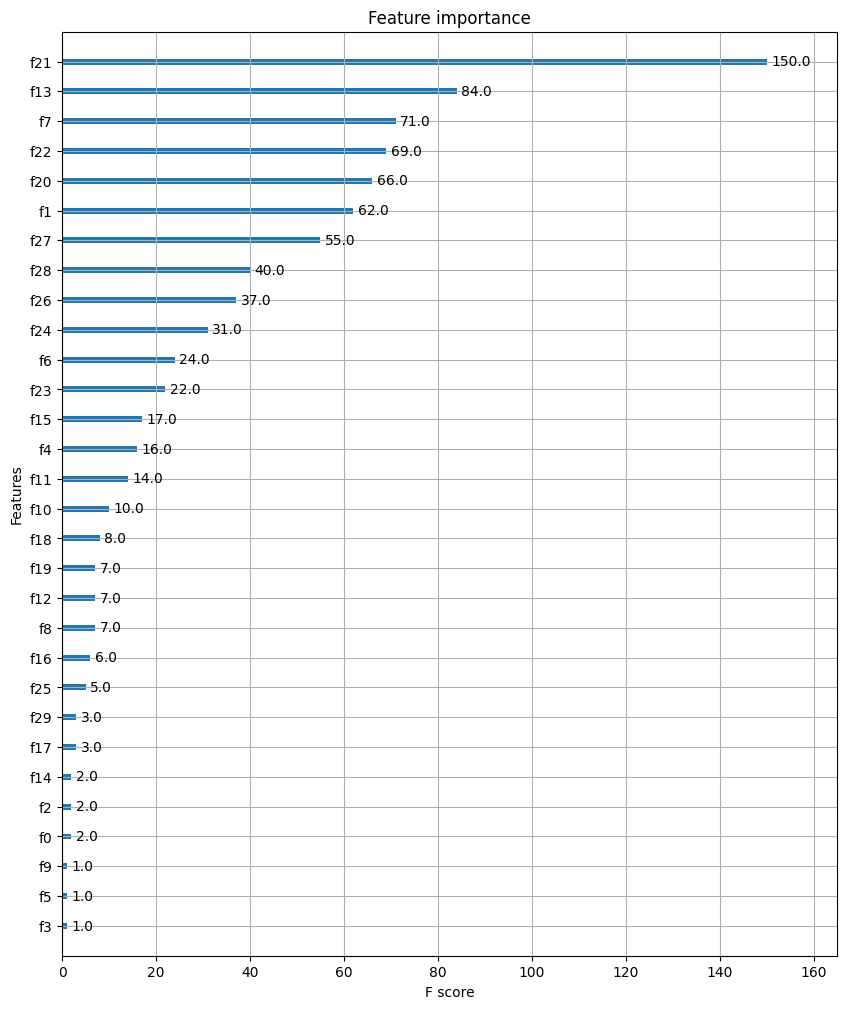

In [25]:
import matplotlib.pyplot as  pit
%matplotlib inline

fig, ax = pit.subplots(figsize=(10, 12))
plot_importance(xgb_model, ax=ax)

# 사이킷런 래퍼 XGBoost의 개요 및 적용

- 위스콘신 대학병원의 유방암 데이터 세트를 분류를 위한 래퍼 클래스인 XGBClassifier를 이용 해 예측

In [30]:
# 사이킷런 래퍼 XGBoost 클래스인 XGBClassifier 임포트
from xgboost import XGBClassifier

# Warning 메시지를 없애기 위해 eval.metric 값을 XGBClassifier 생성 인자로 입력.
xgb_wrapper = XGBClassifier(n_estimators = 400, learning_rate = 0.05, max_depth = 3, eval_metric = 'logloss')
xgb_wrapper.fit(X_train.values, y_train, verbose=True)
w_preds = xgb_wrapper.predict(X_test)
w_pred_proba = xgb_wrapper.predict_proba(X_test)[:,1]

- get_clf_eval()를 이용해 사이킷런 래퍼 XGBoost로 만들어진 모델의 예측 성능 평가

In [31]:
get_clf_eval(y_test, w_preds, w_pred_proba)

오차행렬
[[34  3]
 [ 1 76]]
정확도: 0.9649, 정밀도: 0.9620, 재현율: 0.9870, F10.9744, AUC: 0.9530


- 앞 예제의 파이썬 래퍼 XGBoost보다 더 좋은 평가 결과가 나옴
- 이유는 워낙 위스콘신 데이터 세트의 개수가 워낙 작은데, 이전에는 조기 중단을 위해서 최초 학습 데이터인 X_train을 다시 학습용 X_tr과 X_val로 분리하면서 최종 학습 데이터 건수가 작아지기 때문에 발생한 것으로 추정

- 사이킷런 래퍼XGBoost에서 조기 중단을 수행

In [35]:
from xgboost import XGBClassifier

xgb_wrapper = XGBClassifier(n_estimators=400, learning_rate=0.05, max_depth=3)
evals = [(X_tr.values, y_tr), (X_val.values, y_val)]
xgb_wrapper.fit(X_tr.values, y_tr, early_stopping_rounds=50, eval_metric="logloss", eval_set=evals, verbose=True)

ws50_preds = xgb_wrapper.predict(X_test)
ws50_pred_proba = xgb_wrapper.predict_proba(X_test)[:, 1]

[0]	validation_0-logloss:0.65016	validation_1-logloss:0.66183
[1]	validation_0-logloss:0.61131	validation_1-logloss:0.63609
[2]	validation_0-logloss:0.57563	validation_1-logloss:0.61144
[3]	validation_0-logloss:0.54310	validation_1-logloss:0.59204
[4]	validation_0-logloss:0.51323	validation_1-logloss:0.57329
[5]	validation_0-logloss:0.48447	validation_1-logloss:0.55037
[6]	validation_0-logloss:0.45796	validation_1-logloss:0.52929
[7]	validation_0-logloss:0.43436	validation_1-logloss:0.51534
[8]	validation_0-logloss:0.41150	validation_1-logloss:0.49718
[9]	validation_0-logloss:0.39027	validation_1-logloss:0.48154
[10]	validation_0-logloss:0.37128	validation_1-logloss:0.46990
[11]	validation_0-logloss:0.35254	validation_1-logloss:0.45474
[12]	validation_0-logloss:0.33528	validation_1-logloss:0.44229
[13]	validation_0-logloss:0.31893	validation_1-logloss:0.42961
[14]	validation_0-logloss:0.30439	validation_1-logloss:0.42065
[15]	validation_0-logloss:0.29000	validation_1-logloss:0.40958
[1

-  마찬가지로 126번째 반복에서 검증 데이터 세트의 성능 평가인 validation_1—logloss가 0.25587로 가장 낮았고, 이후 50번 반복까지 더 이상 성능이 향상되지 않았기 때문에 학습이 조기 종료

In [36]:
get_clf_eval(y_test, ws50_preds, ws50_pred_proba)

오차행렬
[[34  3]
 [ 2 75]]
정확도: 0.9561, 정밀도: 0.9615, 재현율: 0.9740, F10.9677, AUC: 0.9465


In [38]:
# early_stopping_rounds를 10으로 설정하고 재학습.
xgb_wrapper.fit(X_tr.values, y_tr, early_stopping_rounds=10, eval_metric="logloss", eval_set=evals, verbose=True)
ws10_preds = xgb_wrapper.predict(X_test)
ws10_pred_proba = xgb_wrapper.predict_proba(X_test)[:, 1]
get_clf_eval(y_test, ws10_preds, ws10_pred_proba)

[0]	validation_0-logloss:0.65016	validation_1-logloss:0.66183
[1]	validation_0-logloss:0.61131	validation_1-logloss:0.63609
[2]	validation_0-logloss:0.57563	validation_1-logloss:0.61144
[3]	validation_0-logloss:0.54310	validation_1-logloss:0.59204
[4]	validation_0-logloss:0.51323	validation_1-logloss:0.57329
[5]	validation_0-logloss:0.48447	validation_1-logloss:0.55037
[6]	validation_0-logloss:0.45796	validation_1-logloss:0.52929
[7]	validation_0-logloss:0.43436	validation_1-logloss:0.51534
[8]	validation_0-logloss:0.41150	validation_1-logloss:0.49718
[9]	validation_0-logloss:0.39027	validation_1-logloss:0.48154
[10]	validation_0-logloss:0.37128	validation_1-logloss:0.46990
[11]	validation_0-logloss:0.35254	validation_1-logloss:0.45474
[12]	validation_0-logloss:0.33528	validation_1-logloss:0.44229
[13]	validation_0-logloss:0.31893	validation_1-logloss:0.42961
[14]	validation_0-logloss:0.30439	validation_1-logloss:0.42065
[15]	validation_0-logloss:0.29000	validation_1-logloss:0.40958
[1

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

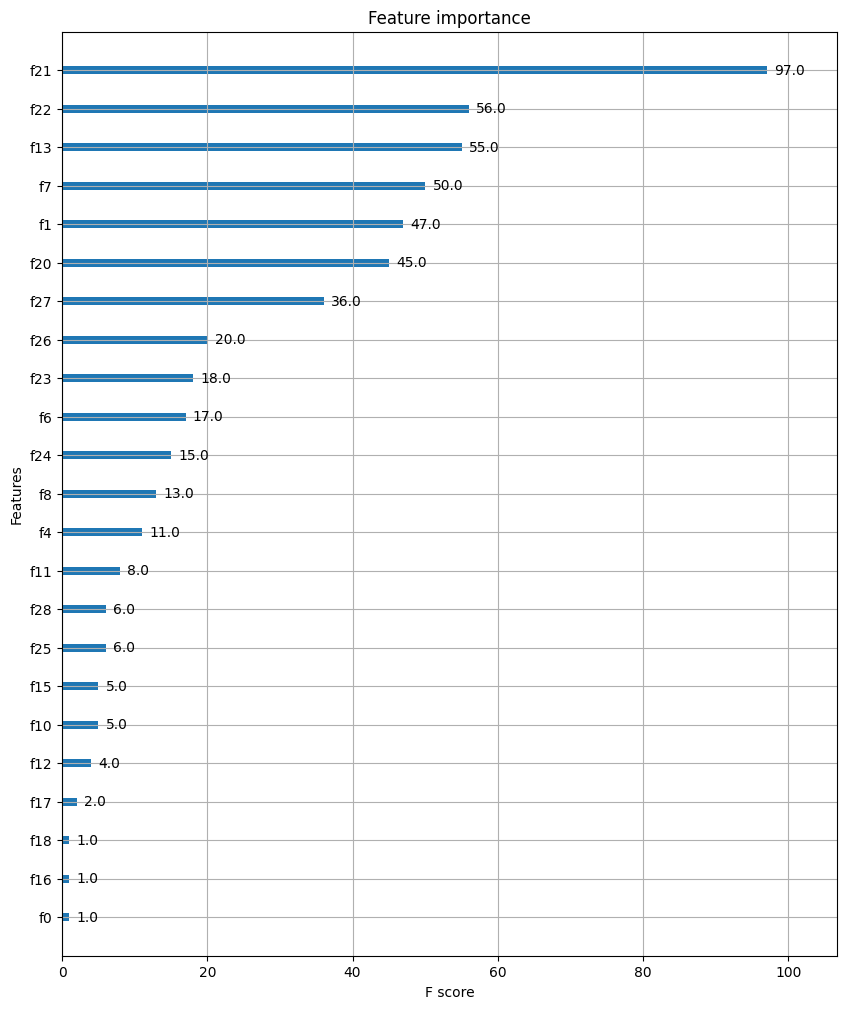

In [39]:
from xgboost import plot_importance
import matplotlib.pyplot as  pit
%matplotlib inline

fig, ax = pit.subplots(figsize=(10, 12))
# 사이킷런 래퍼 클래스를 입력해도 무방.
plot_importance(xgb_wrapper, ax=ax)